<font color='lime'>

# Data preparation and normalization

</font> 

<font color='yellow'>

## A. Visualization of significant features (scatter plots, whisker boxes, histograms)

</font> 

<font color='orange'>

###  Load dataset

</font> 

In [60]:
import pandas as pd

data = pd.read_csv('data/spotify_songs_corrupted.csv')

<font color='orange'>

### Histogram for track_popularity

</font> 

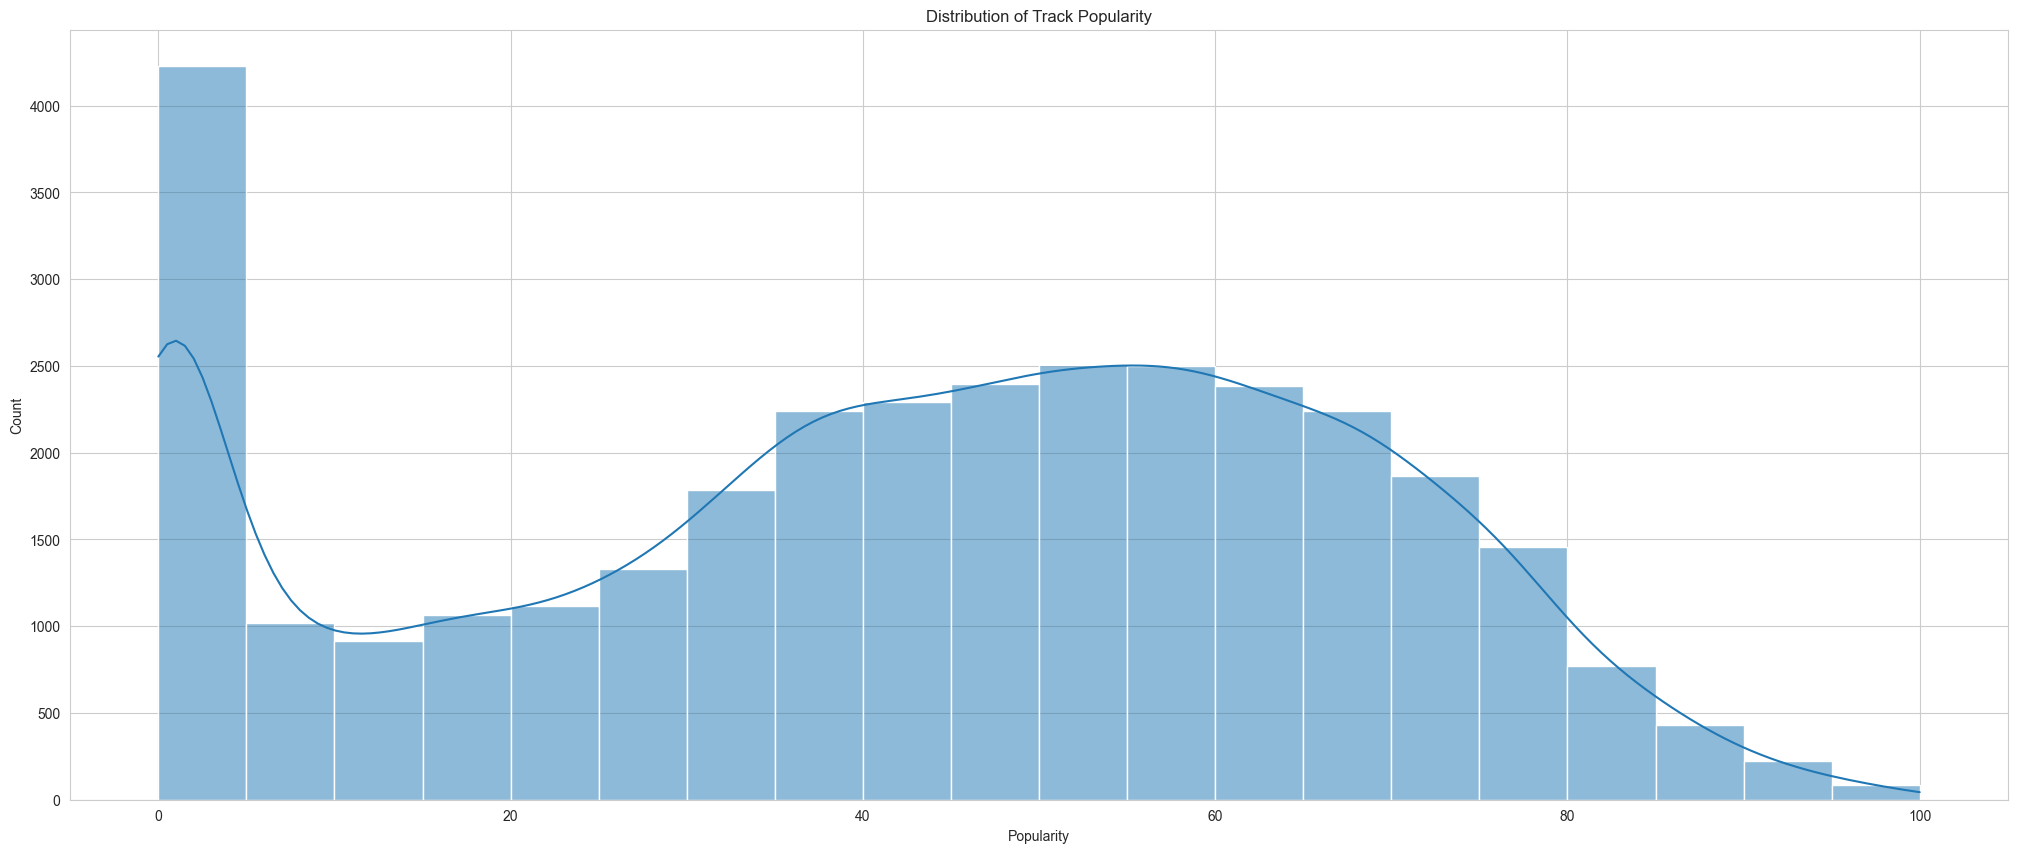

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Histogram for track_popularity
plt.figure(figsize=(25, 10))  # Size for individual plot
sns.histplot(data['track_popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

<font color='orange'>

### Scatter diagram for the energy dependence of danceability

</font> 

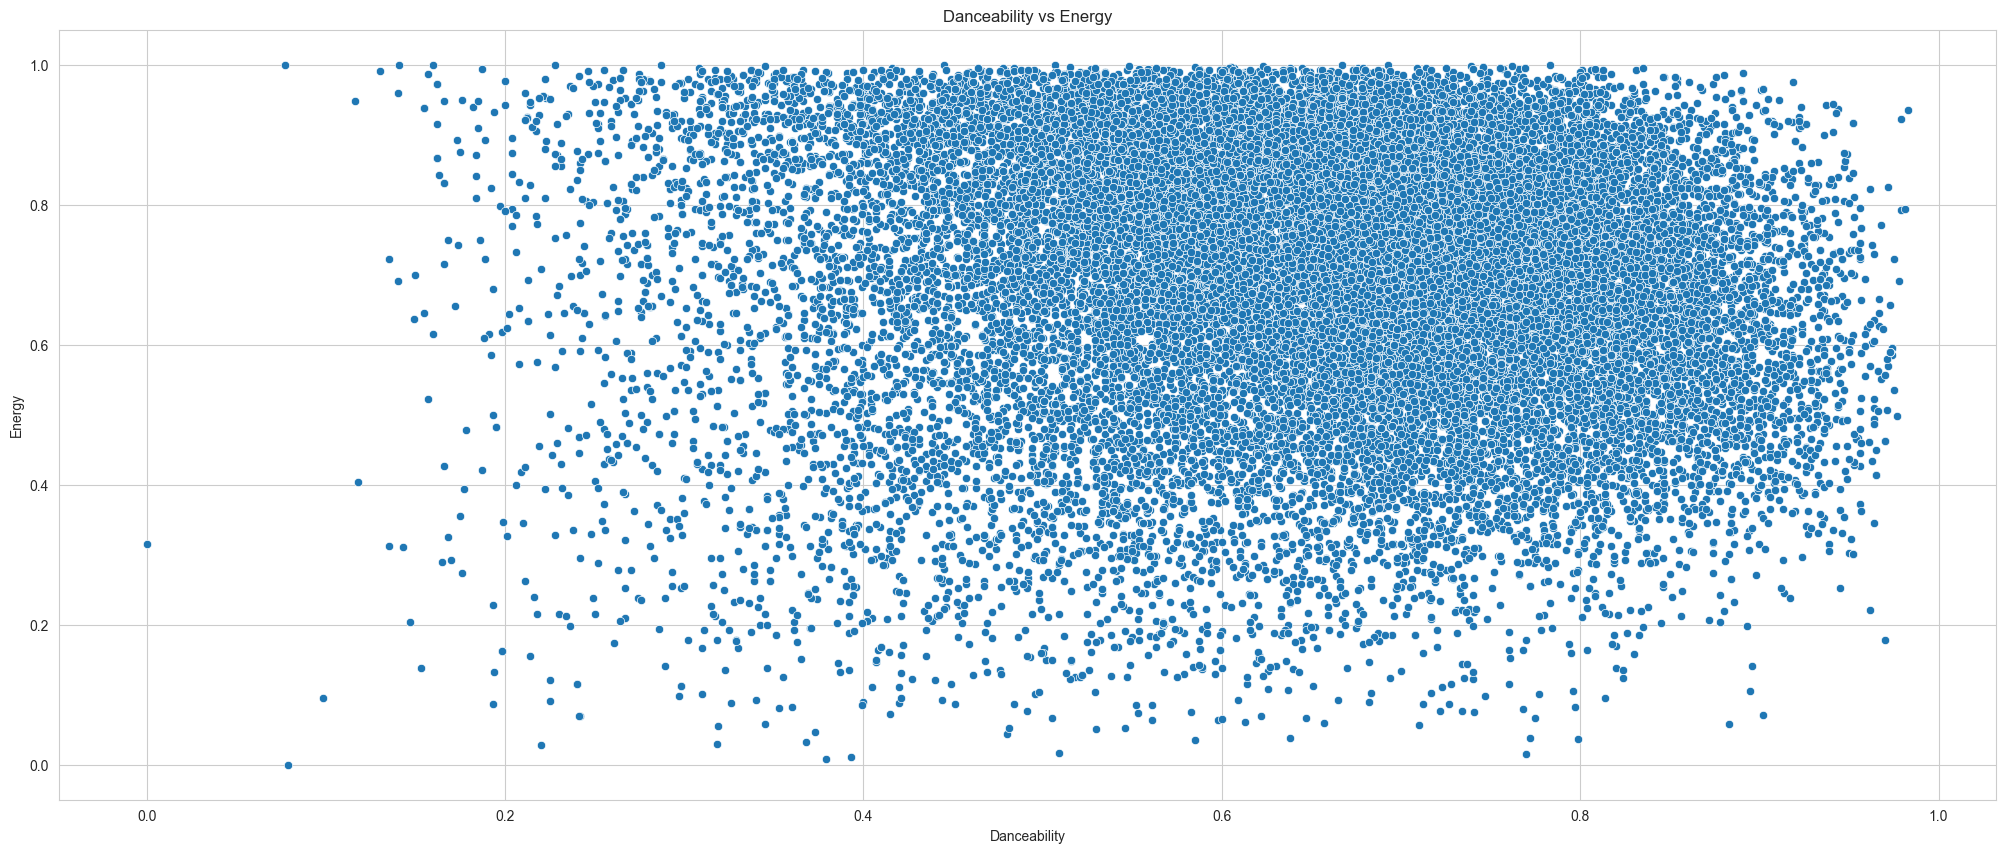

In [62]:
# Scatter plot for danceability vs energy
plt.figure(figsize=(25, 10))  # Size for individual plot
sns.scatterplot(x='danceability', y='energy', data=data)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

<font color='orange'>

### Box plot for loudness

</font> 

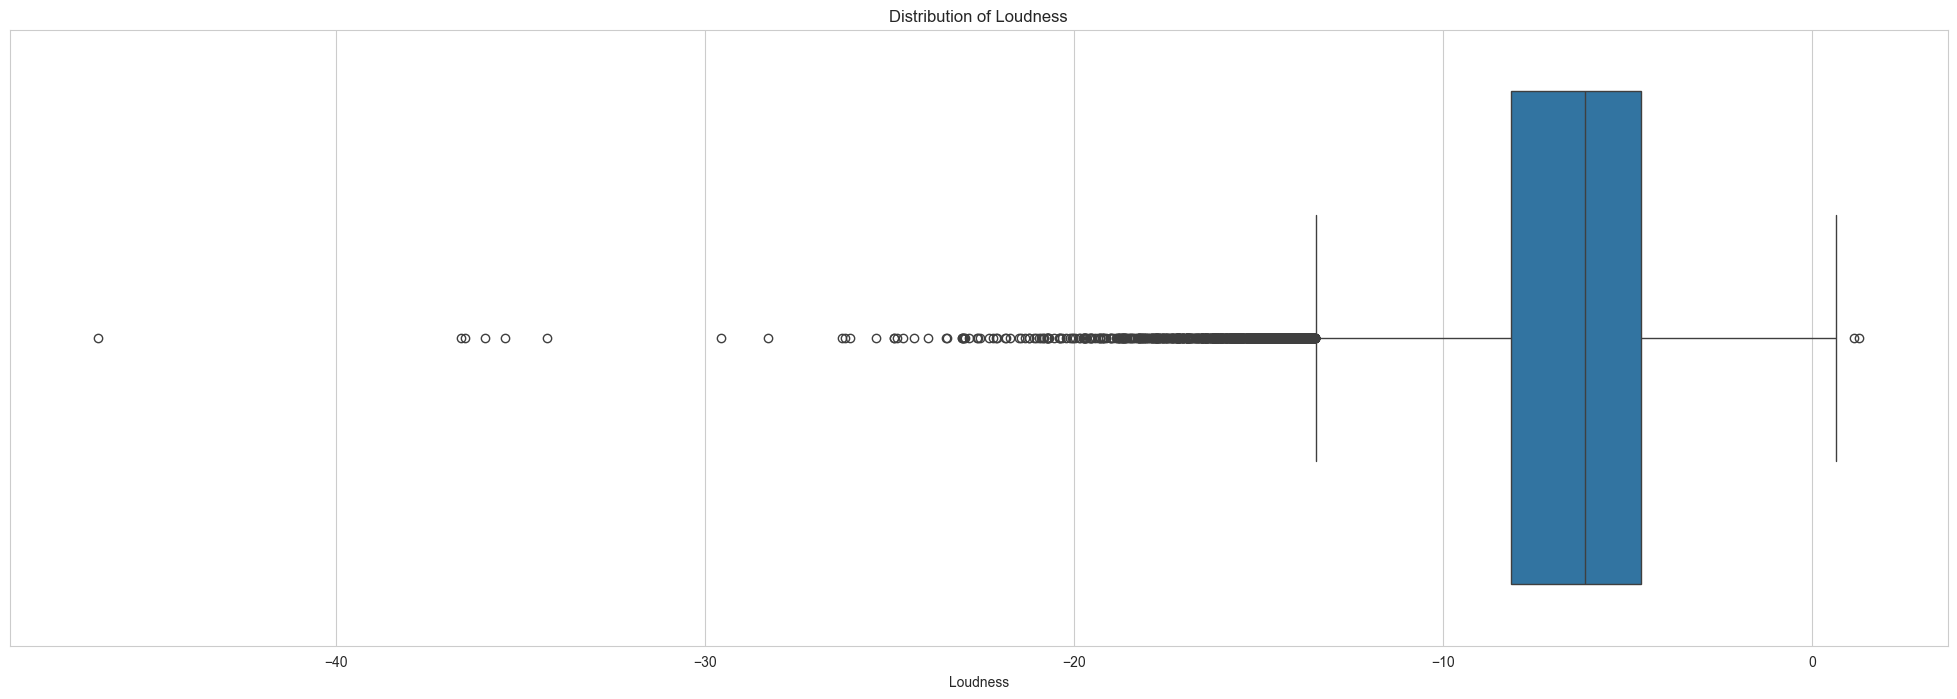

In [63]:
# Box plot for loudness
plt.figure(figsize=(25, 8))  # Size for individual plot
sns.boxplot(x=data['loudness'])
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.show()

<font color='yellow'>

## B. Data cleaning (skip removal, normalization, duplicate removal)

</font>

In [64]:
# 1. Removing rows with missing values
data_cleaned = data.dropna()

# 2. Normalizing numerical features (using Min-Max scaling for this demonstration)
numerical_features = data_cleaned.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    data_cleaned.loc[:, feature] = (data_cleaned[feature] - data_cleaned[feature].min()) / (data_cleaned[feature].max() - data_cleaned[feature].min())

# 3. Removing duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Display the shape of the original and cleaned dataframes to see the difference
original_shape = data.shape
cleaned_shape = data_cleaned.shape

original_shape, cleaned_shape

# Save cleaned subset to a CSV file
file_path = "data/spotify_songs_cleaned.csv"
data_cleaned.to_csv(file_path, index=False)
file_path

'data/spotify_songs_cleaned.csv'

<font color='yellow'>

## C. Data correlation (correlation matrix)

</font> 

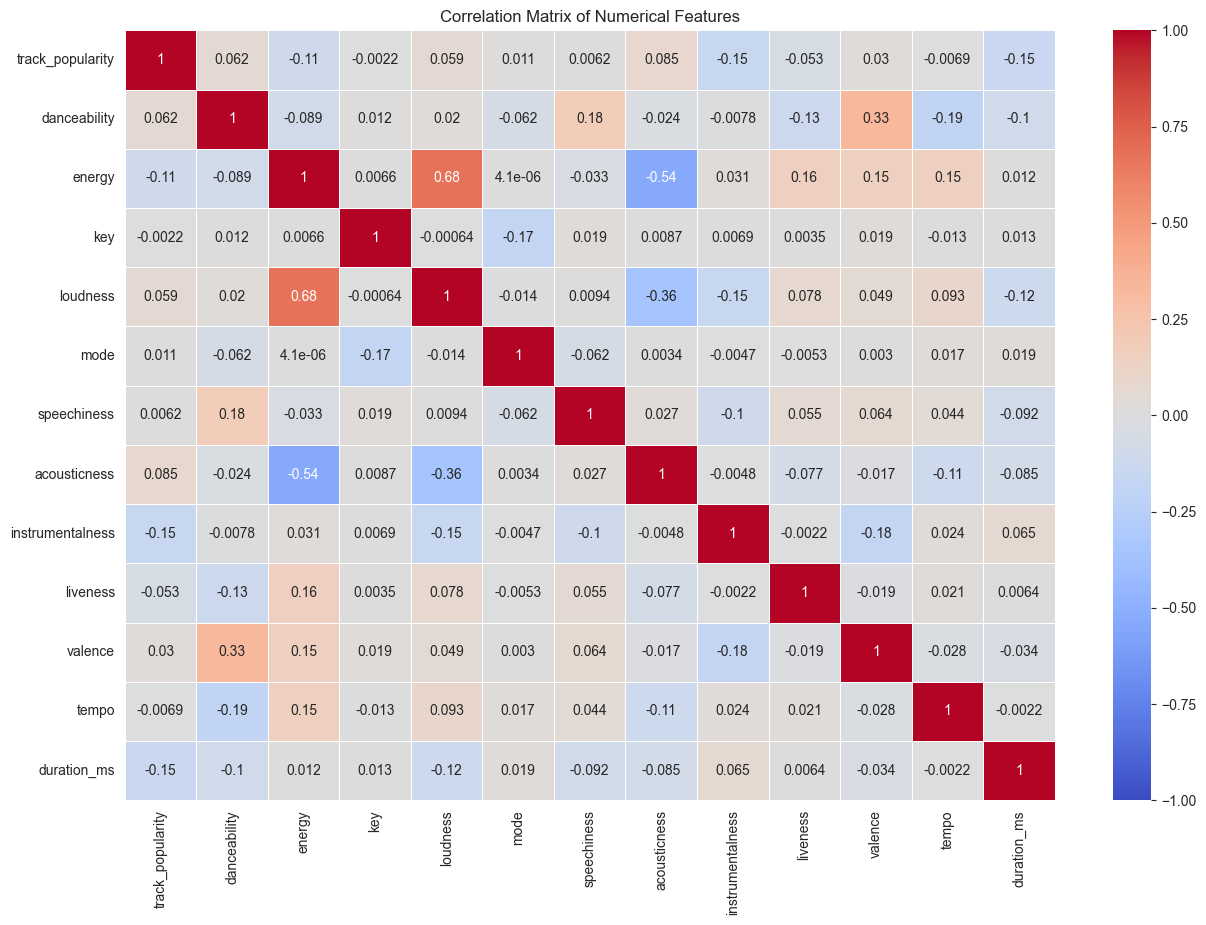

In [65]:
# Compute the correlation matrix
correlation_matrix = data_cleaned[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()